<a href="https://colab.research.google.com/github/raghavmayank/ML/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Find the optimum number of principal components for the features in the
above-mentioned data

In [33]:
import numpy as np
import pandas as pd
import urllib
from pathlib import Path
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

DIABETES_DATASET_PATH = "ml/assignment2/diabetes.csv"
def prepare_dataset():
    dataset_path = Path(DIABETES_DATASET_PATH)
    if not dataset_path.is_file():
        Path("ml/assignment2").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/raghavmayank/data/main/raw/diabetes.csv"
        urllib.request.urlretrieve(url, dataset_path)
    return pd.read_csv(dataset_path)
diabetes_dataset = prepare_dataset()
num_cols = list(
    diabetes_dataset.drop(
        columns=['Outcome']
        ).select_dtypes(include='number').columns.values)
cat_cols = list(
    set(diabetes_dataset.columns) - set(num_cols + ['Outcome'])
)
num_cols = list(
    diabetes_dataset.drop(
        columns=['Outcome']
        ).select_dtypes(include='number').columns.values)
cat_cols = list(set(diabetes_dataset.columns) - set(num_cols + ['Outcome']))
preprocessor = ColumnTransformer([(
    'scaler',
    StandardScaler(),
    num_cols),
     ('encoder',OrdinalEncoder(),cat_cols)])
X = preprocessor.fit_transform(diabetes_dataset.drop(columns='Outcome'))
y = diabetes_dataset[['Outcome']]
pca = PCA(random_state=42)
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
optimal = []
for i in [i for i in np.linspace(np.min(cumulative_variance),1,15)]:
    components = np.argmax(
        cumulative_variance[cumulative_variance <= i]) + 1
    if components not in optimal:
        optimal.append(components)
print("Optimal number of principal components:", optimal)

Optimal number of principal components: [1, 2, 3, 4, 5, 6, 8]


Use any two regression models of your choice and find the prediction accuracy and error
between the reduced data (with optimum number of principal components) and the complete data.

In [34]:
import warnings

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  recall_score, roc_auc_score, f1_score

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LogisticRegression(random_state=42)
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
recal_score_lr = recall_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)


ridge_reg = RidgeClassifier(random_state=42)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
recal_score_rc = recall_score(y_test, y_pred)
roc_auc_rc = roc_auc_score(y_test, y_pred)
f1_rc = f1_score(y_test, y_pred)

df = pd.DataFrame(columns=['Model','components','recall score','ROC AUC','F1'])
models = {'Logistic Regression':LogisticRegression(random_state=42), 'Ridge Regression':RidgeClassifier(random_state=42)}
i = 0
for name,model in models.items():
    for comp in optimal:

        pca = PCA(n_components=comp,random_state=42)
        X_train_reduced = pca.fit_transform(X_train)
        X_test_reduced = pca.transform(X_test)

        Model = model.fit(X_train_reduced,y_train)
        y_pred_reduced = Model.predict(X_test_reduced)

        rec = recall_score(y_test, y_pred_reduced)
        roc = roc_auc_score(y_test, y_pred_reduced)
        f1 = f1_score(y_test,y_pred)

        df.loc[i,:] = [name,comp,rec,roc,f1]
        i+=1
df.loc[df['Model']=='Logistic Regression','recall score original'] = round(recal_score_lr,4)
df.loc[df['Model']=='Logistic Regression','ROC AUC original'] = round(roc_auc_lr,4)
df.loc[df['Model']=='Logistic Regression','F1 original'] = round(f1_lr,4)
df.loc[df['Model']=='Ridge Regression','recall score original'] = round(recal_score_rc,4)
df.loc[df['Model']=='Ridge Regression','ROC AUC original'] = round(roc_auc_rc,4)
df.loc[df['Model']=='Ridge Regression','F1 original'] = round(f1_rc,4)
df

,Model,components,recall score,ROC AUC,F1,recall score original,ROC AUC original,F1 original
0,Logistic Regression,1,0.4,0.634343,0.666667,0.6727,0.7354,0.6607
1,Logistic Regression,2,0.509091,0.668687,0.666667,0.6727,0.7354,0.6607
2,Logistic Regression,3,0.509091,0.668687,0.666667,0.6727,0.7354,0.6607
3,Logistic Regression,4,0.527273,0.677778,0.666667,0.6727,0.7354,0.6607
4,Logistic Regression,5,0.527273,0.692929,0.666667,0.6727,0.7354,0.6607
5,Logistic Regression,6,0.654545,0.746465,0.666667,0.6727,0.7354,0.6607
6,Logistic Regression,8,0.672727,0.735354,0.666667,0.6727,0.7354,0.6607
7,Ridge Regression,1,0.381818,0.630303,0.666667,0.6727,0.7404,0.6667
8,Ridge Regression,2,0.509091,0.658586,0.666667,0.6727,0.7404,0.6667
9,Ridge Regression,3,0.509091,0.668687,0.666667,0.6727,0.7404,0.6667


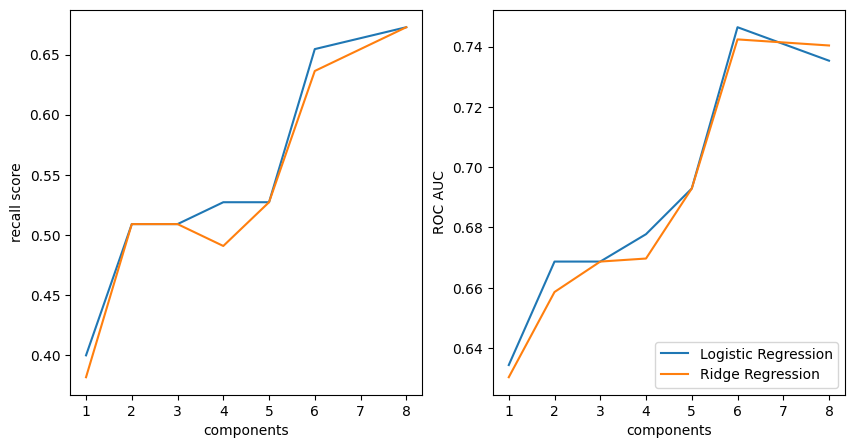

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby(['Model','components']).max().astype(float).round(3).to_excel('optimal.xlsx')
figure, ax = plt.subplots(1,2,figsize=(10,5))
g = sns.lineplot(data=df,x='components',y='recall score',hue='Model',ax=ax[0],legend=None)
k = sns.lineplot(data=df,x='components',y='ROC AUC',hue='Model',ax=ax[1])
k.legend(loc='lower right')
plt.show()

Train the k-means model on f-MNIST data with k = 10 and 10 random 784 dimensional points (in input range) as initializations. Report the number of points in each cluster.


In [11]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans

mnist = fetch_openml('Fashion-MNIST')
X = mnist.data
y = mnist.target

X = X / 255.0

kmeans = KMeans(n_clusters=10, init='random', random_state=42).fit(X)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of points in each cluster:", cluster_counts)

Number of points in each cluster: {0: 8940, 1: 11262, 2: 5047, 3: 3343, 4: 8810, 5: 2726, 6: 2995, 7: 7646, 8: 8682, 9: 10549}


b) Visualize the cluster centers of each cluster as 2-d images of all clusters.

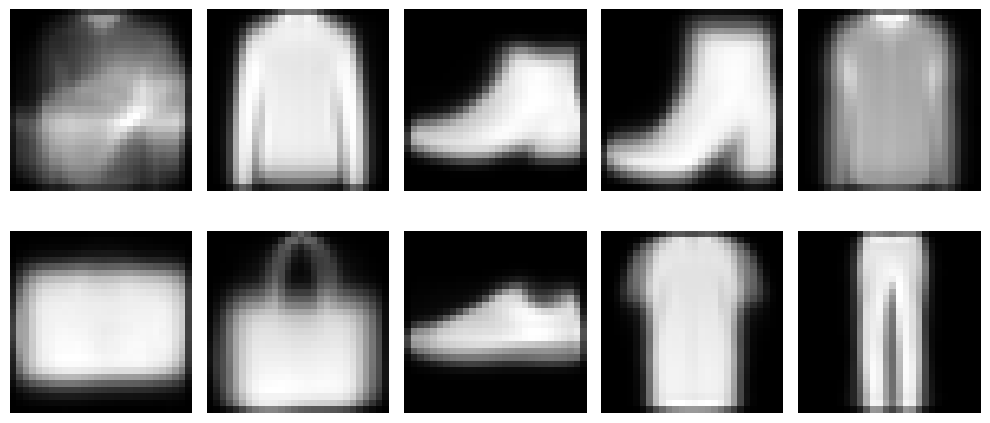

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


c) Visualize 10 images corresponding to each cluster.

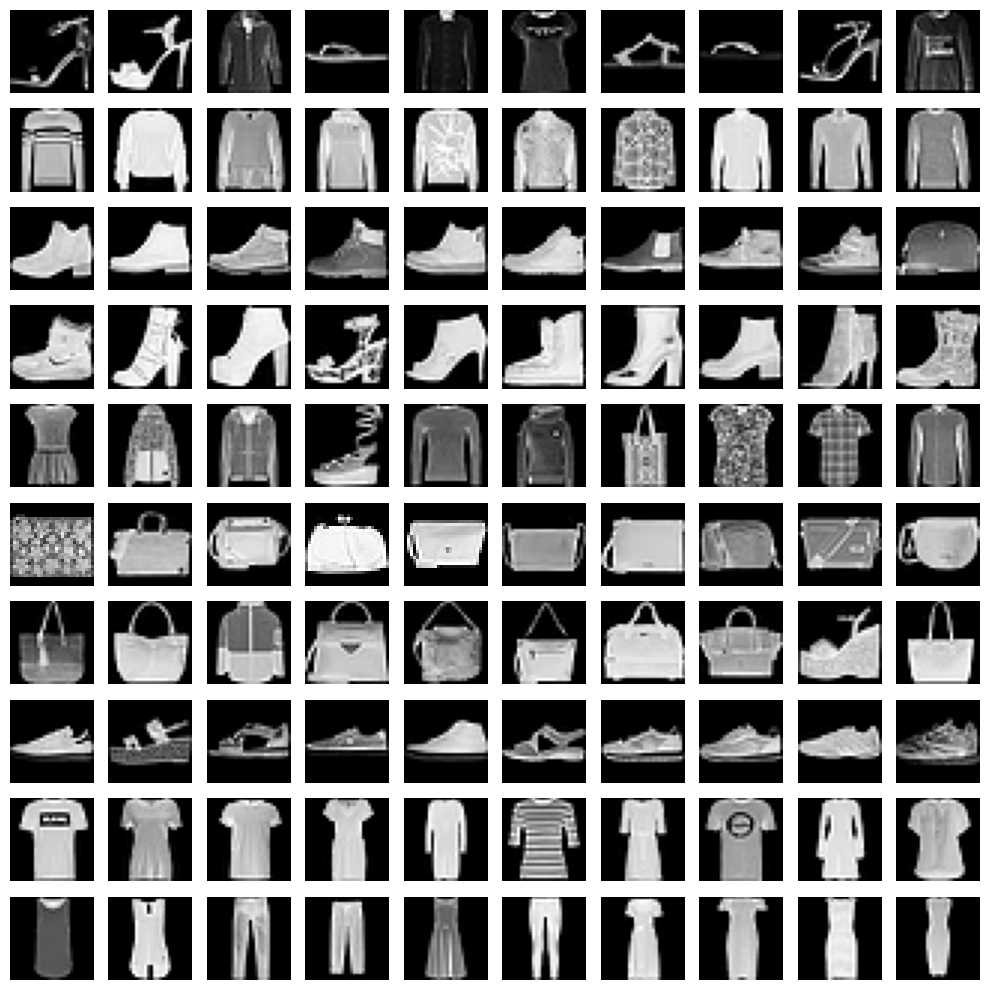

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
X_np = X.to_numpy() if hasattr(X, 'to_numpy') else X
for i in range(10):
    idx = np.where(kmeans.labels_ == i)[0][:10]
    for j, ax in enumerate(axes[i]):
        ax.imshow(X_np[idx[j]].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

d) Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster and visualize the cluster centers.

In [14]:
X_np = X.to_numpy() if hasattr(X, 'to_numpy') else X
y_np = y.to_numpy().flatten() if hasattr(y, 'to_numpy') else y

init_centroids = []
for i in range(10):
    class_idx = np.where(y_np == str(i))[0][:1]
    if len(class_idx) > 0:
        init_centroids.extend(X_np[class_idx])
    else:
        print(f"No samples found for class {i}")

init_centroids = np.array(init_centroids)
print("Shape of initial centroids:", init_centroids.shape)

if init_centroids.shape[0] == 10:  # Assuming 10 clusters
    kmeans_init_class = KMeans(n_clusters=10, init=init_centroids, n_init=1).fit(X_np)
    unique_init, counts_init = np.unique(kmeans_init_class.labels_, return_counts=True)
    cluster_counts_init = dict(zip(unique_init, counts_init))
    print("Number of points in each cluster (with class initialization):", cluster_counts_init)

Shape of initial centroids: (10, 784)
Number of points in each cluster (with class initialization): {0: 7489, 1: 6094, 2: 11185, 3: 6046, 4: 8588, 5: 9242, 6: 2962, 7: 8862, 8: 2725, 9: 6807}


e) Visualize 10 images corresponding to each cluster.

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    idx = np.where(kmeans_init_class.labels_ == i)[0][:10]
    for j, ax in enumerate(axes[i]):
        ax.imshow(X_np[idx[j]].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()


f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report
the scores and comment on which case is a better clustering.

In [15]:
sse_a = kmeans.inertia_
sse_d = kmeans_init_class.inertia_

print("SSE for part a (random initialization):", sse_a)
print("SSE for part d (class initialization):", sse_d)

if sse_d < sse_a:
    print("Clustering with class initialization is better.")
else:
    print("Clustering with random initialization is better.")

SSE for part a (random initialization): 2223798.432612044
SSE for part d (class initialization): 2239796.7130589634
Clustering with random initialization is better.


In [16]:
import numpy as np

class KMeansMod:
    def __init__(self, n_clusters=5, init='auto', max_iter=300):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.cluster_centers_ = None

    def fit(self, X):
        if self.init == 'auto':
            self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        else:
            self.cluster_centers_ = self.init

        for _ in range(self.max_iter):
            labels = self._assign_labels(X)
            new_centers = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            if np.allclose(self.cluster_centers_, new_centers):
                break

        if _ == self.max_iter-1:
            print(f"reached max iterations {_+1}.")
        else:
            print(f"converged at {_+1} iteration.")

            self.cluster_centers_ = new_centers

        return self

    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=0)

model = KMeansMod(n_clusters=5, max_iter=100)
nidel = model.fit(X_np)


reached max iterations 100.


Preprocess & visualize the data. Create train, val, and test splits but take into consideration the class distribution (Hint: Look up stratified splits).

In [18]:
DRY_BEANS_DATASET_PATH = "ml/assignment2/Dry_Bean_Dataset.xlsx"
def prepare_dataset():
    dataset_path = Path(DRY_BEANS_DATASET_PATH)
    if not dataset_path.is_file():
        Path("ml/assignment2").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/raghavmayank/data/main/raw/Dry_Bean_Dataset.xlsx"
        urllib.request.urlretrieve(url, dataset_path)
    return pd.read_excel(dataset_path)
dry_beans_dataset = prepare_dataset()


In [19]:
dry_beans_dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


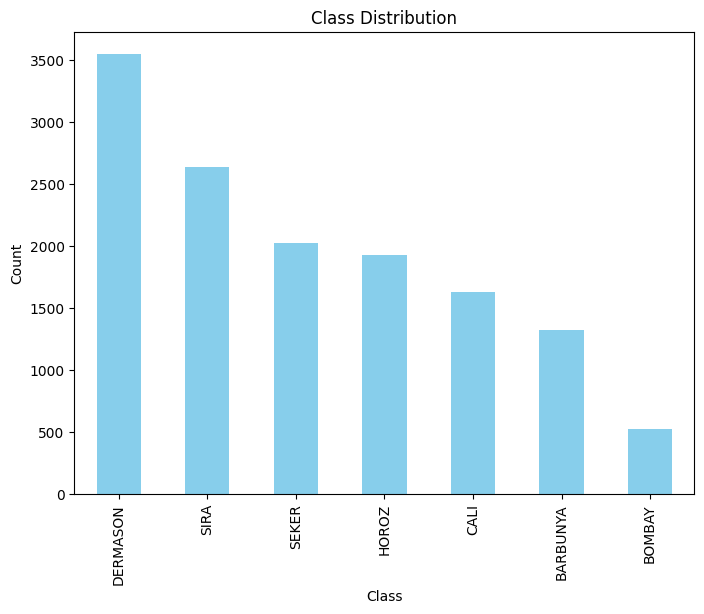

In [21]:
X = dry_beans_dataset[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'roundness','AspectRation','ConvexArea']]
y = OrdinalEncoder().fit_transform(dry_beans_dataset[['Class']]).reshape(-1)

plt.figure(figsize=(8, 6))
dry_beans_dataset['Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)
print(X_train.shape[0],X_val.shape[0],X_test.shape[0])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

8166 2722 2723


In [23]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def derivative_relu(x):
    return np.where(x > 0, 1, 0)

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def compute_loss(y, y_hat):
    m = y.shape[0]
    correct_log_probs = -np.log(y_hat[np.arange(m), y.astype(int)])
    loss = np.sum(correct_log_probs) / m
    return loss

def to_categorical(y, num_classes):
    """Convert class vector (integers) to binary class matrix."""
    y_int = np.array(y, dtype=int)
    return np.eye(num_classes)[y_int]

In [24]:
class MLP:
    def __init__(self, input_dim, hidden_layers, output_dim, activation_funcs, learning_rate=0.01):
        self.weights = []
        self.biases = []
        self.activation_funcs = activation_funcs
        self.learning_rate = learning_rate

        layers = [input_dim] + hidden_layers + [output_dim]

        for i in range(len(layers) - 1):
            self.weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
            self.biases.append(np.zeros((1, layers[i+1])))

    def forward(self, X):
        self.A = [X]
        for i in range(len(self.weights) - 1):
            Z = self.A[-1].dot(self.weights[i]) + self.biases[i]
            self.A.append(self.activation_funcs[i](Z))
        Z = self.A[-1].dot(self.weights[-1]) + self.biases[-1]
        self.A.append(softmax(Z))
        return self.A[-1]

    def backward(self, X, y):
        y_hat = self.A[-1]
        y = to_categorical(y, y_hat.shape[1])

        dZ = y_hat - y
        m = X.shape[0]

        for i in reversed(range(len(self.weights))):
            dW = self.A[i].T.dot(dZ) / m
            dB = np.sum(dZ, axis=0, keepdims=True) / m
            if i > 0:
                dZ = dZ.dot(self.weights[i].T) * derivative_relu(self.A[i])
            self.weights[i] -= self.learning_rate * dW
            self.biases[i] -= self.learning_rate * dB

    def train(self, X_train, y_train, epochs):
        for epoch in range(epochs):
            y_hat = self.forward(X_train)
            loss = compute_loss(y_train, y_hat)
            self.backward(X_train, y_train)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        y_hat = self.forward(X)
        return np.argmax(y_hat, axis=1)

In [25]:
input_dim = X_train.shape[1]
hidden_layers = [64, 32]
output_dim = len(np.unique(y_train))

activation_funcs = [relu for _ in range(len(hidden_layers))] + [softmax]

model = MLP(input_dim, hidden_layers, output_dim, activation_funcs)
model.train(X_train, y_train, epochs=1000)

Epoch 0, Loss: 1.945931443417386
Epoch 100, Loss: 1.9197636041420882
Epoch 200, Loss: 1.9001902275307647
Epoch 300, Loss: 1.8855634199317948
Epoch 400, Loss: 1.8746168911045569
Epoch 500, Loss: 1.8663898826675744
Epoch 600, Loss: 1.860161369832805
Epoch 700, Loss: 1.85540038343456
Epoch 800, Loss: 1.8517196788439922
Epoch 900, Loss: 1.8488384754661416


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def create_adjusted_model(activation_function='relu', layers=[64, 32], learning_rate = 0.001):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(X_train.shape[1],), activation=activation_function))
    for units in layers[1:]:
        model.add(Dense(units, activation=activation_function))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

adjusted_model = create_adjusted_model(activation_function='relu', layers=[128, 64, 32])
adjusted_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 11719 (45.78 KB)
Trainable params: 11719 (45.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
d = pd.DataFrame(columns=['Activation function','layers','Train Accuracy','Test Accuracy','learning rate'])
i = 0
for fun in ['relu','sigmoid','tanh']:
    for layer in [[32],[64,32],[128,64,32]]:
        for lr in [0.1,0.01,0.001,0.0001]:
            model = create_adjusted_model(activation_function=fun,layers=layer,learning_rate=lr)
            history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)
            _, train_acc = model.evaluate(X_train,y_train)
            test_loss, test_acc = model.evaluate(X_test, y_test)
            d.loc[i,'Activation function'] = fun
            d.loc[i,'layers'] = ",".join([str(i) for i in layer]) if len(layer)>1 else layer[0]
            d.loc[i,'learning rate'] = lr
            d.loc[i,'Train Accuracy'] = train_acc
            d.loc[i,'Test Accuracy'] = test_acc
            i+=1

Epoch 1/10
205/205 [==============================] - 3s 7ms/step - loss: 0.4194 - accuracy: 0.8656 - val_loss: 0.4011 - val_accuracy: 0.8843
Epoch 2/10
205/205 [==============================] - 1s 4ms/step - loss: 0.3456 - accuracy: 0.8870 - val_loss: 0.3458 - val_accuracy: 0.8941
Epoch 3/10
205/205 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8925 - val_loss: 0.4760 - val_accuracy: 0.8647
Epoch 4/10
205/205 [==============================] - 1s 6ms/step - loss: 0.3282 - accuracy: 0.8944 - val_loss: 0.4618 - val_accuracy: 0.8537
Epoch 5/10
205/205 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8916 - val_loss: 0.3043 - val_accuracy: 0.9094
Epoch 6/10
205/205 [==============================] - 1s 5ms/step - loss: 0.3174 - accuracy: 0.8983 - val_loss: 0.3689 - val_accuracy: 0.8843
Epoch 7/10
205/205 [==============================] - 1s 5ms/step - loss: 0.3080 - accuracy: 0.8942 - val_loss: 0.3112 - val_accuracy: 0.9070
Epoch 

In [28]:
d['rank'] = d.groupby(['Activation function'])['Test Accuracy'].rank(ascending=False)

In [29]:
d

,Activation function,layers,Train Accuracy,Test Accuracy,learning rate,rank
0,relu,32,0.905339,0.895703,0.1,8.0
1,relu,32,0.912197,0.899743,0.01,7.0
2,relu,32,0.907788,0.911127,0.001,1.0
3,relu,32,0.770267,0.770474,0.0001,11.0
4,relu,"64,32",0.880725,0.876974,0.1,10.0
5,relu,"64,32",0.911952,0.901212,0.01,6.0
6,relu,"64,32",0.915381,0.908924,0.001,3.0
7,relu,"64,32",0.88893,0.889093,0.0001,9.0
8,relu,"128,64,32",0.300392,0.300037,0.1,12.0
9,relu,"128,64,32",0.912809,0.90415,0.01,5.0


In [30]:
d.sort_values(by='rank').to_csv(r'ml/assignment2/log.csv',index=False)